In [1]:
import numpy as np

In [2]:
class policy_iteration:
    def __init__(self, value=np.zeros(101), policy=np.ones(101), prob=0.4, gamma=1.0):
        assert isinstance(value, np.ndarray) and len(value) == 101, "value is not a ndarray with length 101"
        assert policy.dtype in (np.int32, np.int64), "policy dtype should be int32 or int64"
        self.value_state = np.copy(value)
        self.value_state_pre = np.copy(value)
        self.policy = np.copy(policy)
        self.policy_pre = np.copy(policy)
        self.rewards = np.zeros(101)
        self.rewards[100] = 1.0
        self.prob = prob
        self.gamma = gamma
        
    def bellman_update(self, curr_state, action):
        if curr_state == 0 or curr_state == 100:
            self.value_state[curr_state] = self.rewards[curr_state]
            # stop here
            return
        self.value_state[curr_state] = self.rewards[curr_state] + \
            self.gamma * (self.prob * self.value_state_pre[curr_state+action] + 
                          (1-self.prob) * self.value_state_pre[curr_state-action])
    
    def optimal_action_search(self, curr_state):
        max_gain = float('-inf')
        opt_action = 0
        for bet_amt in range(1, min(curr_state, 100-curr_state)+1):
            gain = self.gamma * (self.prob * self.value_state[curr_state+bet_amt] + 
                 (1-self.prob) * self.value_state[curr_state-bet_amt])
            if gain > max_gain:
                max_gain = gain
                opt_action = bet_amt
        return opt_action
    
    def policy_evaluation(self, epsilon=1e-6):
        iter_num = 0
        while iter_num == 0 or self.value_state_norm() > epsilon:
            self.value_state_pre = np.copy(self.value_state)
            for state in range(101):
                #update bellman eq
                action = self.policy[state]
                self.bellman_update(state, action)
            iter_num += 1
        return iter_num
    
    def policy_improvement(self):
        self.policy_pre = np.copy(self.policy)
        for state in range(101):
            if state == 0 or state == 100:
                self.policy[state] = 0
                continue
            opt_action = self.optimal_action_search(state)
            self.policy[state] = opt_action
    
    def policy_solver(self, epsilon=1e-6, print_frequency=-1):
        iter_num = 0
        while iter_num == 0 or not self.policy_eq_check():
            eva_iter_num = self.policy_evaluation(epsilon)
            self.policy_improvement()
            iter_num += 1
            if print_frequency > 0 and iter_num % print_frequency == 0:
                print('iter:%d evaluation iteration num:%d' % (iter_num, eva_iter_num))
        if print_frequency > 0:
            print('total iter_num:%d' % (iter_num))
        return self.value_state, self.policy
    
    def value_state_norm(self):
        return np.max(np.absolute(self.value_state - self.value_state_pre))
    
    def policy_eq_check(self):
        return np.array_equal(self.policy, self.policy_pre)
    
        

In [3]:
prob = 0.25
gamma = 1.0
init_value = np.zeros(101)
init_policy = np.zeros(101, dtype=np.int32)
init_policy[1:100] = 1

In [4]:
#test
c = policy_iteration(value=init_value, policy=init_policy, prob=prob, gamma=gamma)
value, policy = c.policy_solver(epsilon=1e-8, print_frequency=1)

iter:1 evaluation iteration num:80
iter:2 evaluation iteration num:52
iter:3 evaluation iteration num:18
iter:4 evaluation iteration num:1
iter:5 evaluation iteration num:1
iter:6 evaluation iteration num:1
iter:7 evaluation iteration num:1
iter:8 evaluation iteration num:1
total iter_num:8


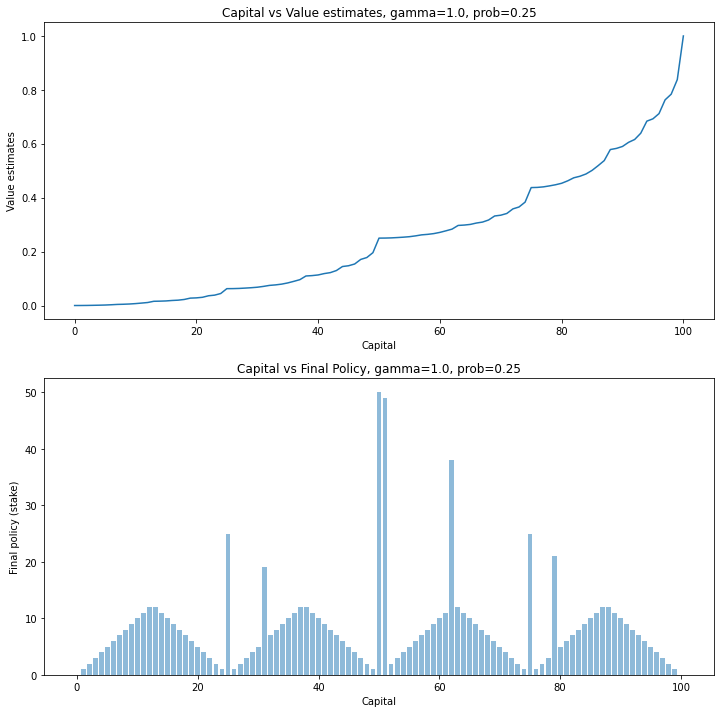

In [5]:
import matplotlib.pyplot as plt

fig=plt.figure(num=1,figsize=(12,12))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(range(101), value)
ax1.set_xlabel('Capital')
ax1.set_ylabel('Value estimates')
ax1.set_title('Capital vs Value estimates, gamma=%.1f, prob=%.2f' % (gamma, prob))

ax2.bar(range(101), policy, align='center', alpha=0.5)
 
ax2.set_xlabel('Capital')
ax2.set_ylabel('Final policy (stake)')
ax2.set_title('Capital vs Final Policy, gamma=%.1f, prob=%.2f' % (gamma, prob))

plt.show()
